**Importing the data**

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir(r'C:\Users\Dinesh Reddy\Downloads\archive (3)\data\with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [9]:
without_mask_files = os.listdir(r'C:\Users\Dinesh Reddy\Downloads\archive (3)\data\without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [12]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [13]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

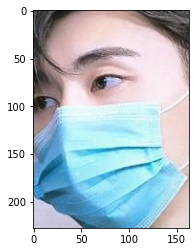

In [18]:
# displaying with mask image
img = mpimg.imread(r'C:\Users\Dinesh Reddy\Downloads\archive (3)\data\with_mask\with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

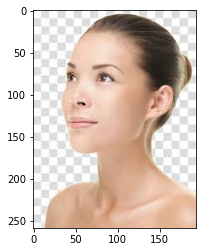

In [20]:
# displaying without mask image
img = mpimg.imread(r'C:\Users\Dinesh Reddy\Downloads\archive (3)\data\without_mask\without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [27]:
# convert images to numpy arrays+

with_mask_path = 'C:\Users\Dinesh Reddy\Downloads\archive (3)\data\with_mask\'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'C:\Users\Dinesh Reddy\Downloads\archive (3)\data\without_mask\'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

C:\Users\Dinesh Reddy\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [28]:
type(data)

list

In [33]:
len(data)

7553

In [32]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [34]:
type(data[0])

numpy.ndarray

In [35]:
data[0].shape

(128, 128, 3)

In [36]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [37]:
type(X)

numpy.ndarray

In [38]:
type(Y)

numpy.ndarray

In [39]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [40]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [43]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [44]:
X_train[0]

array([[[225, 235, 198],
        [210, 216, 186],
        [189, 188, 169],
        ...,
        [187, 182, 165],
        [181, 174, 151],
        [165, 182, 133]],

       [[224, 228, 217],
        [202, 204, 195],
        [201, 199, 193],
        ...,
        [198, 190, 180],
        [177, 169, 154],
        [158, 182, 141]],

       [[205, 204, 214],
        [221, 219, 227],
        [195, 191, 197],
        ...,
        [183, 173, 174],
        [174, 165, 160],
        [174, 203, 166]],

       ...,

       [[155, 176, 199],
        [160, 180, 197],
        [165, 185, 195],
        ...,
        [ 88,  99,  71],
        [106, 113,  85],
        [ 99, 104,  63]],

       [[150, 177, 197],
        [168, 190, 208],
        [174, 192, 209],
        ...,
        [106, 113,  81],
        [ 99, 103,  67],
        [ 99,  99,  33]],

       [[160, 193, 210],
        [177, 198, 221],
        [175, 189, 214],
        ...,
        [103, 107,  70],
        [ 77,  81,  47],
        [ 99,  94,  63]]

In [45]:
X_train_scaled[0]

array([[[0.88235294, 0.92156863, 0.77647059],
        [0.82352941, 0.84705882, 0.72941176],
        [0.74117647, 0.7372549 , 0.6627451 ],
        ...,
        [0.73333333, 0.71372549, 0.64705882],
        [0.70980392, 0.68235294, 0.59215686],
        [0.64705882, 0.71372549, 0.52156863]],

       [[0.87843137, 0.89411765, 0.85098039],
        [0.79215686, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75686275],
        ...,
        [0.77647059, 0.74509804, 0.70588235],
        [0.69411765, 0.6627451 , 0.60392157],
        [0.61960784, 0.71372549, 0.55294118]],

       [[0.80392157, 0.8       , 0.83921569],
        [0.86666667, 0.85882353, 0.89019608],
        [0.76470588, 0.74901961, 0.77254902],
        ...,
        [0.71764706, 0.67843137, 0.68235294],
        [0.68235294, 0.64705882, 0.62745098],
        [0.68235294, 0.79607843, 0.65098039]],

       ...,

       [[0.60784314, 0.69019608, 0.78039216],
        [0.62745098, 0.70588235, 0.77254902],
        [0.64705882, 0

**Building a Convolutional Neural Networks (CNN)**

In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [48]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [49]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 865s 5s/step - loss: 0.5033 - acc: 0.7706 - val_loss: 0.2909 - val_acc: 0.8843
Epoch 2/5
170/170 [==============================] - 770s 5s/step - loss: 0.2938 - acc: 0.8773 - val_loss: 0.2451 - val_acc: 0.9107
Epoch 3/5
170/170 [==============================] - 1083s 6s/step - loss: 0.2575 - acc: 0.8998 - val_loss: 0.2298 - val_acc: 0.9190
Epoch 4/5
170/170 [==============================] - 3861s 23s/step - loss: 0.2083 - acc: 0.9180 - val_loss: 0.2267 - val_acc: 0.9289
Epoch 5/5
170/170 [==============================] - 788s 5s/step - loss: 0.1875 - acc: 0.9253 - val_loss: 0.2138 - val_acc: 0.9240


**Model Evaluation**

In [50]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 39s 804ms/step - loss: 0.1769 - acc: 0.9279
Test Accuracy = 0.9278623461723328


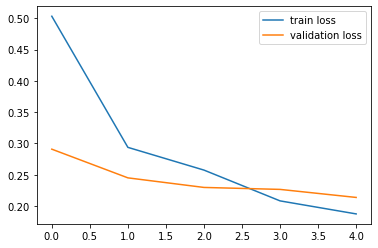

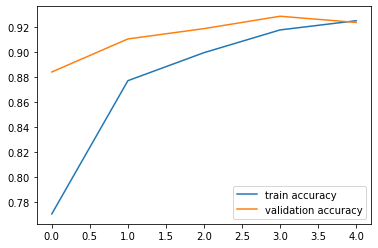

In [51]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
pip install opencv-python



In [65]:
from keras.models import save_model

# ... define and train your model ...

# Save the model architecture and weights to an .h5 file
model.save('my_model.h5')


**Predictive System**

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the pre-trained model
model = load_model('my_model.h5')

# Path of the image to be predicted
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2.imshow("Input Image", input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized / 255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')